In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().values.any()

False

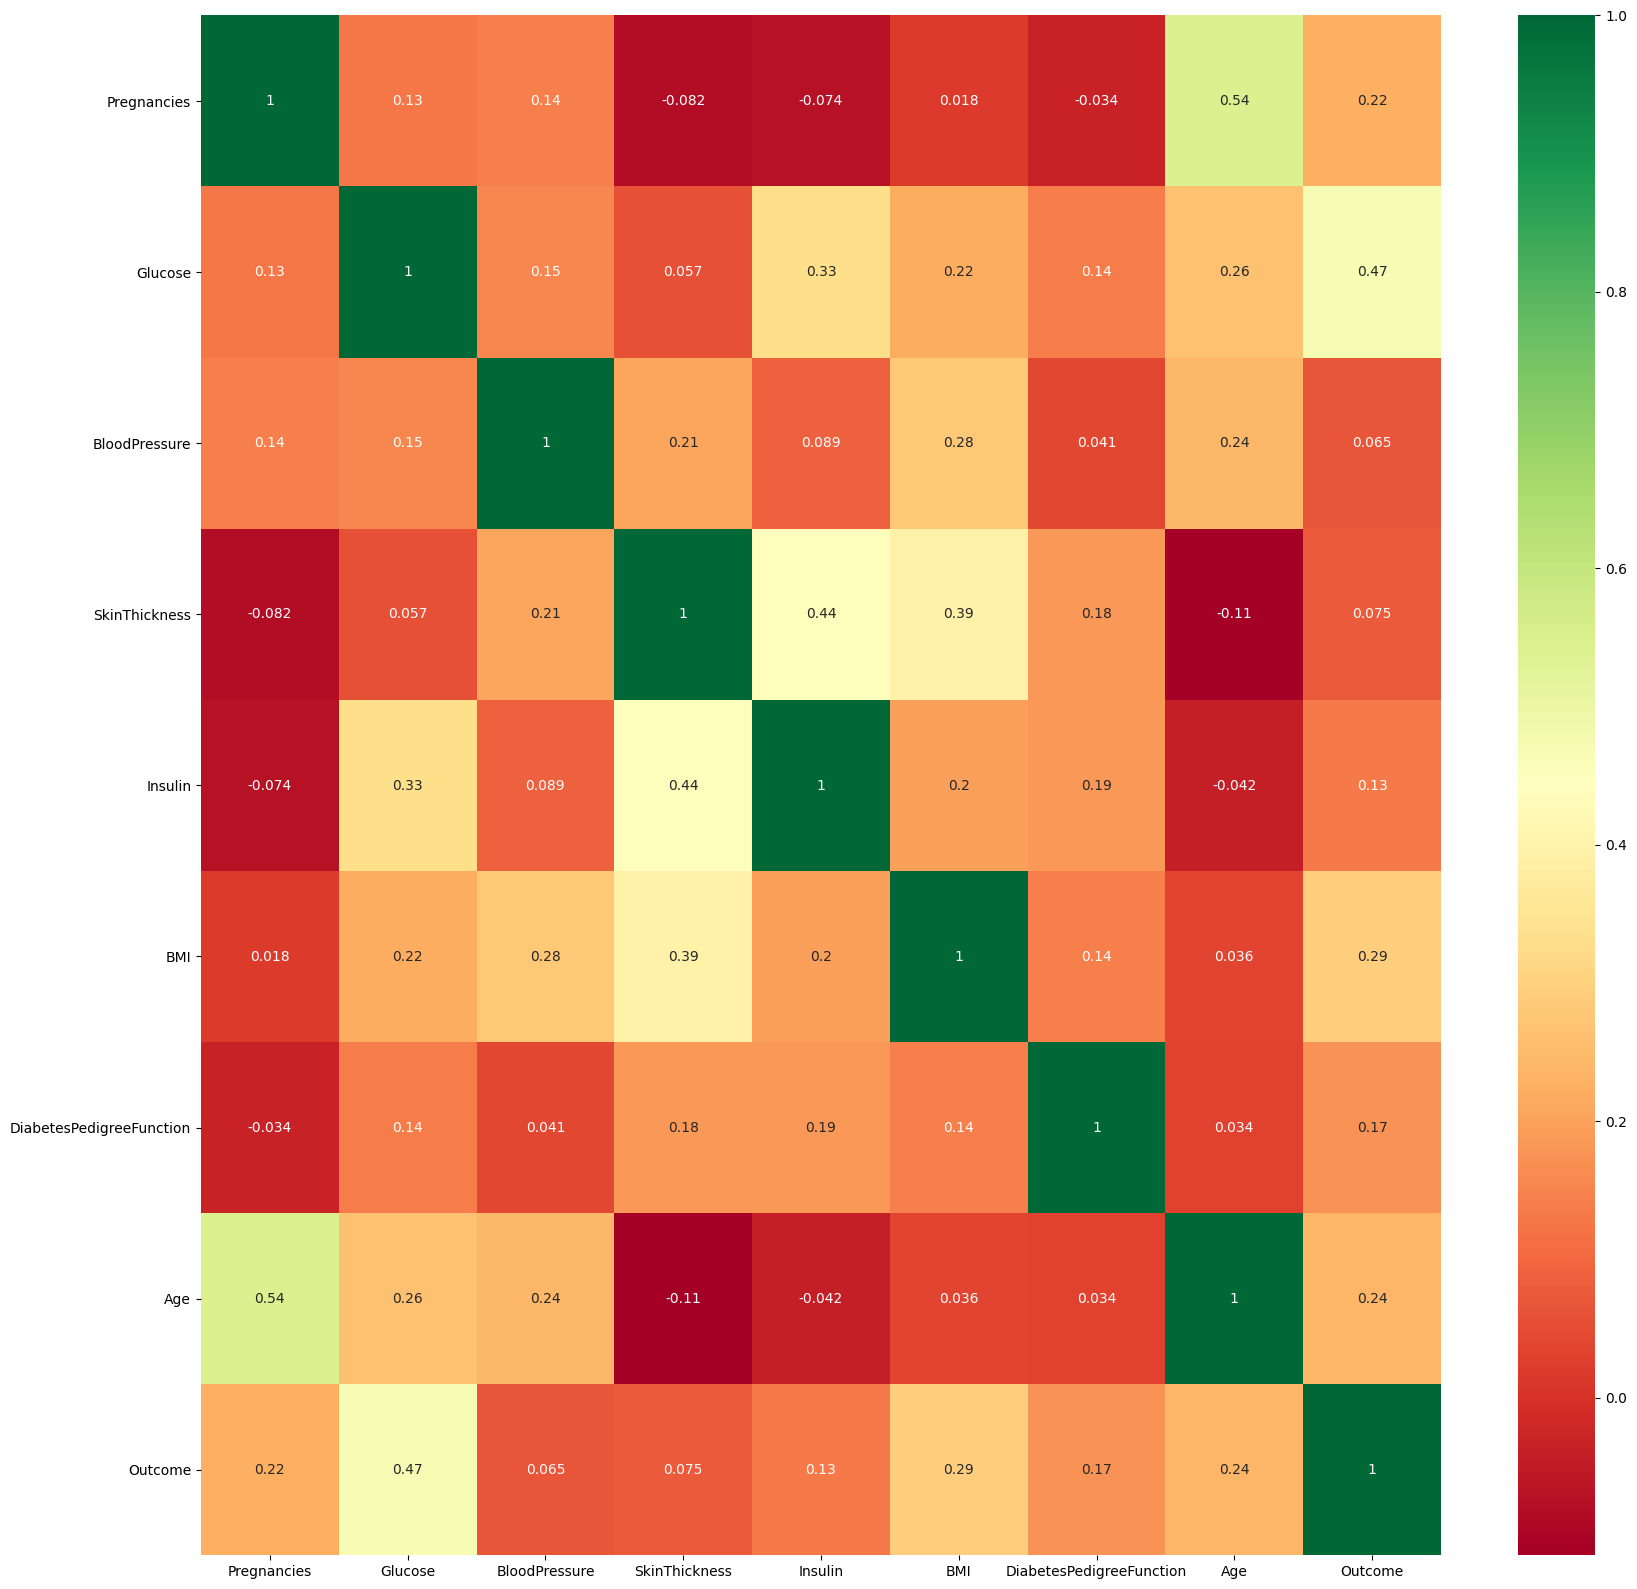

In [6]:
#correlation
import seaborn as sns

#get correlation of each feature in dataset

corrmat= data.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))

#plot heat map

g= sns.heatmap(data[top_corr_features].corr(),annot=True,cmap= "RdYlGn")

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
diabetes_1_count = len(data.loc[data['Outcome']== 1])
diabetes_0_count = len(data.loc[data['Outcome']== 0])
(diabetes_1_count,diabetes_0_count)

(268, 500)

In [9]:
#Train Test Split

from sklearn.model_selection import train_test_split
feature_columns= ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class= ['Outcome']

In [10]:
X= data[feature_columns].values
y= data[predicted_class].values

X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.30,random_state=10)

In [11]:
#checking zero values in feature
print("total number of rows:{0}".format(len(data)))
print("number of rows missing Glucose:{0}".format(len(data.loc[data['Glucose']==0])))
print("number of rows missing BloodPressure:{0}".format(len(data.loc[data['BloodPressure']==0])))
print("number of rows missing SkinThickness:{0}".format(len(data.loc[data['SkinThickness']==0])))
print("number of rows missing Insulin:{0}".format(len(data.loc[data['Insulin']==0])))
print("number of rows missing BMI:{0}".format(len(data.loc[data['BMI']==0])))
print("number of rows missing DiabetesPedigreeFunction:{0}".format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("number of rows missing Age:{0}".format(len(data.loc[data['Age']==0])))


total number of rows:768
number of rows missing Glucose:5
number of rows missing BloodPressure:35
number of rows missing SkinThickness:227
number of rows missing Insulin:374
number of rows missing BMI:11
number of rows missing DiabetesPedigreeFunction:0
number of rows missing Age:0


In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=0, strategy="mean")

X_train= imputer.fit_transform(X_train)
X_test= imputer.fit_transform(X_test)

In [14]:
#Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state= 10)

random_forest_model.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=10)

In [15]:
predict_train_data= random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy= {0:.3f}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy= 0.766


In [16]:
#hyper parameter optimization
params= {
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight": [1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]

}

In [17]:
#RandomizedSearachCV

from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [18]:
classifier= xgboost.XGBRFClassifier()
classifier

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [19]:
random_search= RandomizedSearchCV(classifier,param_distributions= params,n_iter=5,scoring='roc_auc',n_jobs= -1,cv=5,verbose=3)

In [20]:
def timer(start_time= None):
    if not start_time:
        start_time= datetime.now()
        return start_time

    elif start_time:
        
        thour,temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin,tsec = divmod(temp_sec,60)
        print('\n Time taken:%i hours %i minutes and %s seconds.'%(thour,tmin,round(tsec,2)))

In [21]:
X_train

array([[2.00e+00, 8.90e+01, 9.00e+01, ..., 3.35e+01, 2.92e-01, 4.20e+01],
       [4.00e+00, 1.46e+02, 8.50e+01, ..., 2.89e+01, 1.89e-01, 2.70e+01],
       [1.00e+01, 1.11e+02, 7.00e+01, ..., 2.75e+01, 1.41e-01, 4.00e+01],
       ...,
       [3.00e+00, 1.16e+02, 7.40e+01, ..., 2.63e+01, 1.07e-01, 2.40e+01],
       [1.00e+00, 8.80e+01, 3.00e+01, ..., 5.50e+01, 4.96e-01, 2.60e+01],
       [5.00e+00, 9.60e+01, 7.40e+01, ..., 3.36e+01, 9.97e-01, 4.30e+01]])

In [22]:
from datetime import datetime

start_time= timer(None)
random_search.fit(X,y.ravel())
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken:0 hours 0 minutes and 9.85 seconds.


In [23]:
random_search.best_estimator_

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.5, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0.2,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=15, max_leaves=None,
                min_child_weight=5, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [25]:
classifier= xgboost.XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.5, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0.2,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=15, max_leaves=None,
                min_child_weight=5, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None)

In [26]:
classifier.fit(X_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.5, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0.2,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=15, max_leaves=None,
                min_child_weight=5, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [27]:
y_pred= classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
score= accuracy_score(y_test,y_pred)

In [30]:
cm

array([[144,   0],
       [ 87,   0]], dtype=int64)

In [31]:
score

0.6233766233766234

In [33]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(classifier,X,y.ravel(),cv=10)

In [34]:
score

array([0.64935065, 0.64935065, 0.64935065, 0.64935065, 0.64935065,
       0.64935065, 0.64935065, 0.64935065, 0.65789474, 0.65789474])

In [35]:
score.mean()

0.6510594668489406